In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [62]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'roughly 20 percent of the age data is missing while cabin column is missing too much data.'

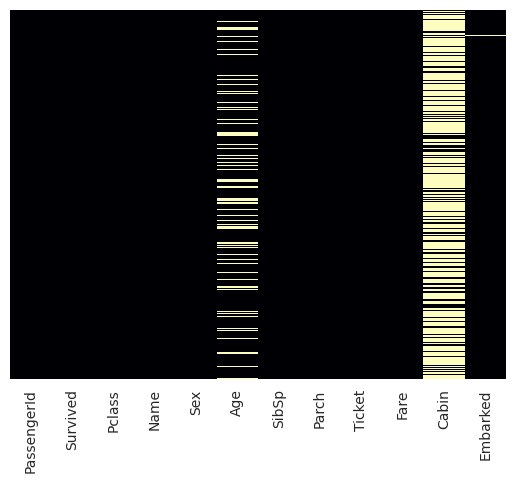

In [64]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='magma')
"""roughly 20 percent of the age data is missing while cabin column is missing too much data."""


<Axes: xlabel='Pclass', ylabel='count'>

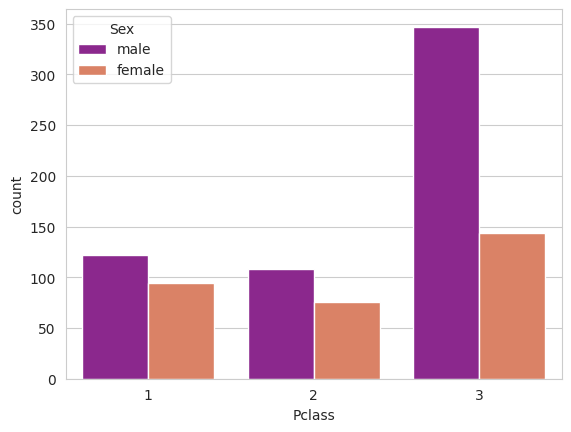

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='Sex',data=df,palette='plasma')

<Axes: xlabel='Survived', ylabel='count'>

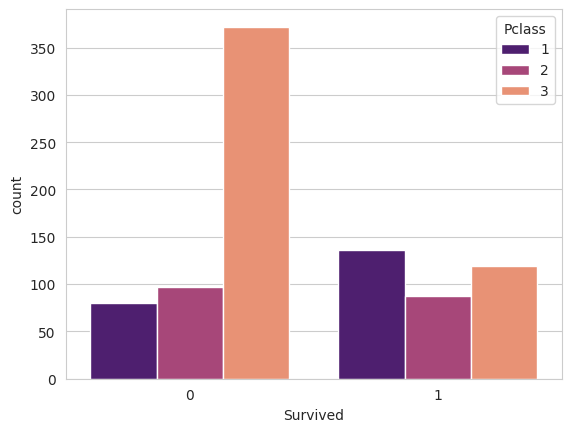

In [66]:
sns.countplot(x='Survived',hue='Pclass', data=df, palette='magma')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

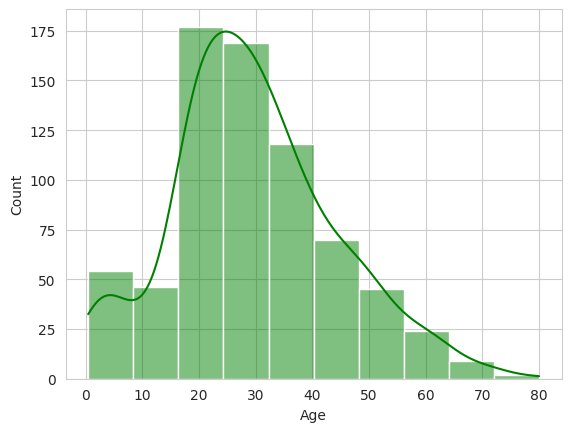

In [67]:
sns.histplot(df['Age'].dropna(), kde=True, color='green', bins=10)

<Axes: xlabel='Pclass', ylabel='Age'>

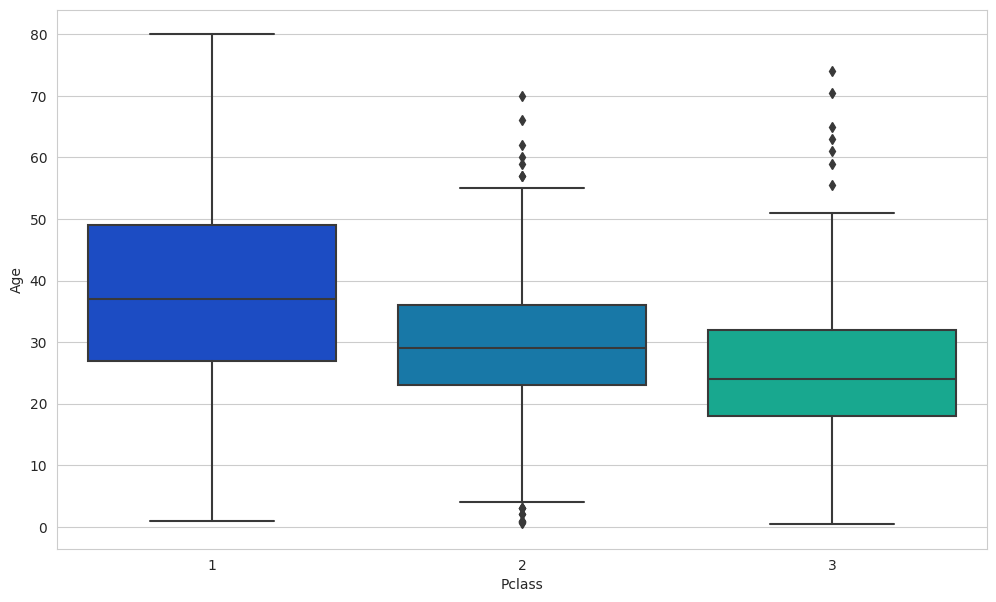

In [68]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age',data=df, palette='winter')
#missing values ko we can replace by mean or median of the data with the help of boxplot.
#we can find median with the help of the boxplot.

In [69]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age

/tmp/ipykernel_33/3415496511.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
/tmp/ipykernel_33/3415496511.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

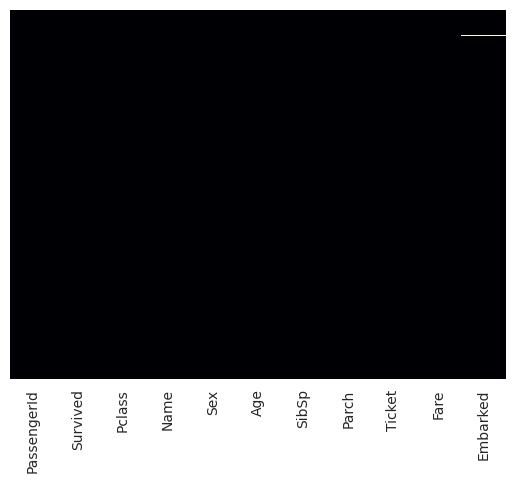

In [108]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()
df['Age']=df[['Age','Pclass']].apply(impute_age, axis=1)
df.drop('Cabin',axis=1, inplace=True)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='magma')

In [104]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
dummy=pd.get_dummies(df['Embarked'],drop_first=True).head()
dummy=dummy.astype(int)
dummy.head()
#get_dummies convert the categories present in the mentioned columns. like embarked has 2 categories.
#drop_first will drop the first column because we can represent first in the form of other two columns.


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [111]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [112]:
df.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [113]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.3,random_state=101)
#here X is all the columns except survived column and y value is survived column only. 

In [124]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
predict=model.predict(X_test)


In [120]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(Y_test, predict)
accuracy

array([[133,  21],
       [ 60,  54]])

In [121]:
prediction=model.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, prediction)


0.6977611940298507

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'], test_size=0.3, random_state=42)
X_train = X_train.astype(float)
model=RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model.fit(X_train, Y_train)
predict=model.predict(X_test)
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(Y_test, predict)
prediction=model.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, prediction)


0.7164179104477612